# 16.1 

In [89]:
import numpy as np
import pandas as pd

a = pd.Series([1,2,3,4,5])
b = pd.Series([5,4,3,2,1])

In [90]:
a+b

0    6
1    6
2    6
3    6
4    6
dtype: int64

In [91]:
a*b

0    5
1    8
2    9
3    8
4    5
dtype: int64

In [92]:
a-b

0   -4
1   -2
2    0
3    2
4    4
dtype: int64

In [93]:
a/b

0    0.2
1    0.5
2    1.0
3    2.0
4    5.0
dtype: float64

# 16.2

# USD/KRW Exchange Rate
## get historical data of usd-krw exchange
https://kr.investing.com/currencies/usd-krw-historical-data 
   * Create (1 year of exchange rate)
   * Report (as much as you can)

# * Create

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')

In [5]:
# This function crops data for year and month
def cropData(year="", month=""):
    dt = df['date']
    year, month = str(year), str(month)
    if len(month) == 1:
        month = '0' + month

    return df[dt.str.contains(str(year)+'_ ' + str(month))]

# * Report 

# 1. Plot every month

In [56]:
def plot(year="", month=""):
    fig = plt.figure()
    ax = fig.add_subplot(111) 
    cropped = cropData(year, month)
    plt.title("Price of dollar on " + str(month) + ", " + str(year))

    X = cropped['date'][cropped['currp'].astype(float).idxmax()][-3:-1], cropped['date'][cropped['currp'].astype(float).idxmin()][-3:-1] # Global Positive and Negative (x)
    Y = cropped['currp'].astype(float).max(), cropped['currp'].astype(float).min() # Global Positive and Negative (y)
    plt.plot([int(i[-3:-1]) for i in cropped['date']], cropped['currp'].astype(float) , 'go-', label="Common price")
    plt.plot([int(i[-3:-1]) for i in cropped['date']], cropped['highp'].astype(float) , 'ro-', label="High price")
    plt.plot([int(i[-3:-1]) for i in cropped['date']], cropped['lowp'].astype(float) , 'bo-', label="Low price")
    plt.legend()

    for xy in zip(X, Y):                                       
        ax.annotate('currp(%s, %s)' % xy, xy=xy, textcoords='data') 

    plt.grid()

    plt.show(ax)



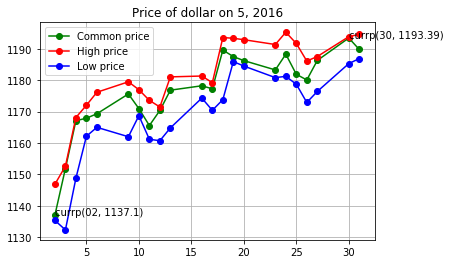

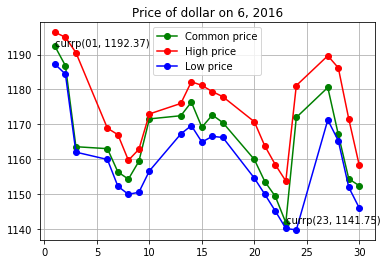

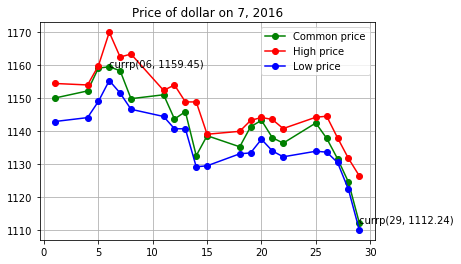

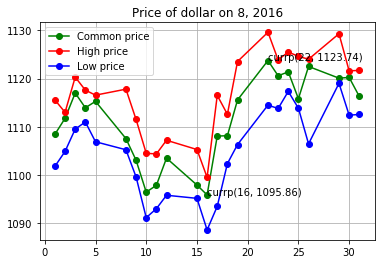

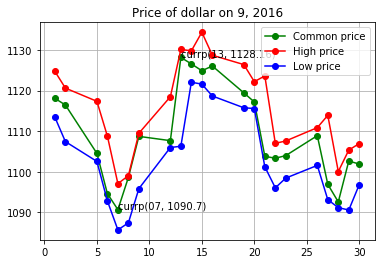

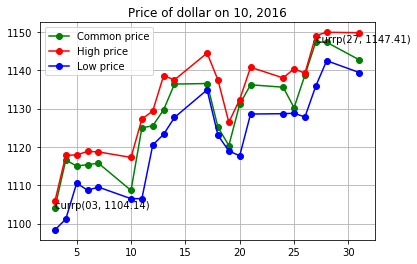

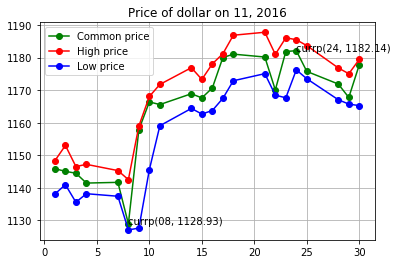

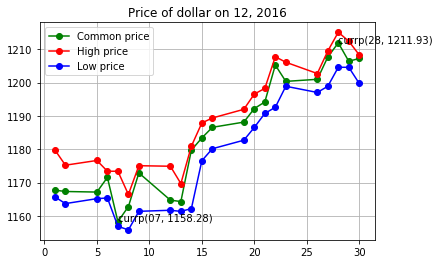

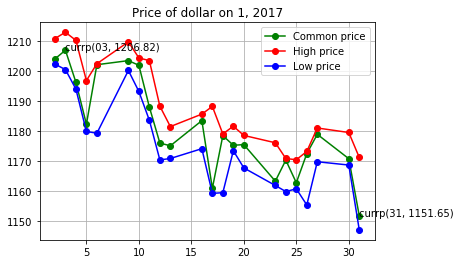

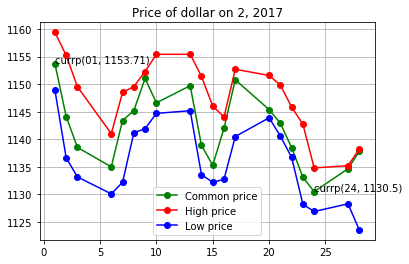

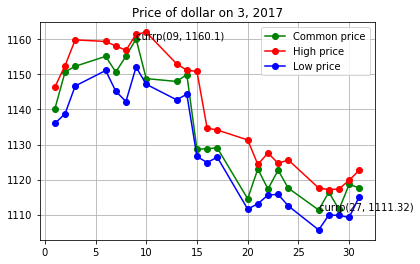

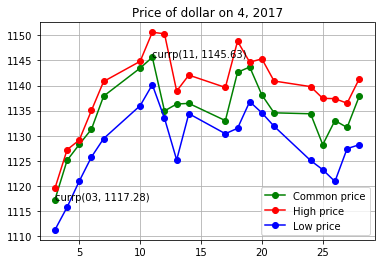

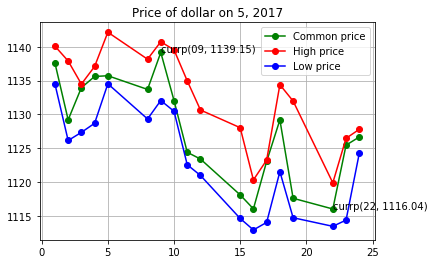

In [57]:
# Change in 2016
for i in range(5, 13):
    plot(2016,i)

# Change in 2017
for i in range(1,6):
    plot(2017,i)

# Report #1: profitable months

Investors can get profit due to increased price of dollar if they buy it on the first day of these months:
    - 2016
        - May
        - August
        - October
        - November
        - December
    - 2017
        - April

However, these months return decreased price of the dollar, so it is recommended to buy dollar on the end of the month.
        
    - 2016
        - June
        - July
        - September
    - 2017
        - January
        - February
        - March
        - May

# Let's see the whole plot through one year

Weekends are not included because there are no trades.(obviously)

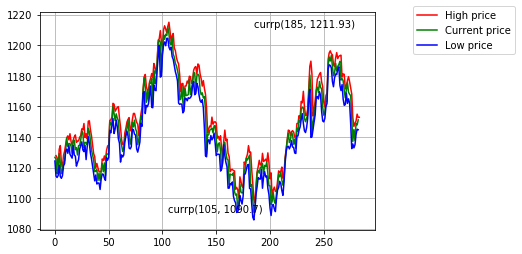

In [63]:
def plotWhole():
    fig = plt.figure()
    axWhole = fig.add_subplot(111) 
    cropped = cropData()
    axWhole.plot([i for i in range(1,len(cropped['date'])+1)],cropped['highp'].astype(float), 'r-', label="High price")
    axWhole.plot([i for i in range(len(cropped['date']))],cropped['currp'].astype(float), 'g-', label="Current price")
    axWhole.plot([i for i in range(len(cropped['date']))],cropped['lowp'].astype(float), 'b-', label="Low price")

    plt.legend(bbox_to_anchor=(1.1, 1.05))



    X = cropped['currp'].astype(float).idxmin(), \
        cropped['currp'].astype(float).idxmax() # Global negative and positive (x)
    Y = cropped['currp'].astype(float).min(), \
        cropped['currp'].astype(float).max() # Global negative and positive (y)

    for xy in zip(X[::-1], Y):                                       
        axWhole.annotate('currp(%s, %s)' % xy, xy=xy, textcoords='data') 

    axWhole.grid()
    plt.show(axWhole)

plotWhole()

## Minimum price appears on 105th day, and maximum price appears on 185th day.

### Let's search the month and year with the index which represents the price.

In [64]:
gNegative, gPositive = cropped['date'][cropped['currp'].astype(float).idxmin()], \
                       cropped['date'][cropped['currp'].astype(float).idxmax()]

In [66]:
print("Minimum price on {0}th day".format(cropped['currp'].astype(float).idxmin()+1), gNegative, \
      "\nMaximum price on {0}th day".format(cropped['currp'].astype(float).idxmax()+1),gPositive)

Minimum price on 186th day 2016_ 09_ 07_ 
Maximum price on 106th day 2016_ 12_ 28_


### It seems that the cycle of increasing and decreasing happens between 70~80 days.

### To verify this, annotate more points on the plot.

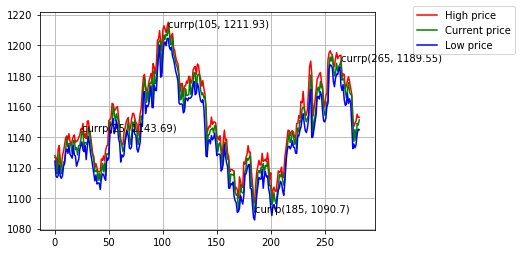

In [70]:
def plotWhole():
    fig = plt.figure()
    axWhole = fig.add_subplot(111) 
    cropped = cropData()
    axWhole.plot([i for i in range(len(cropped['date']))],cropped['highp'].astype(float), 'r-', label="High price")
    axWhole.plot([i for i in range(len(cropped['date']))],cropped['currp'].astype(float), 'g-', label="Current price")
    axWhole.plot([i for i in range(len(cropped['date']))],cropped['lowp'].astype(float), 'b-', label="Low price")

    plt.legend(bbox_to_anchor=(1.1, 1.05))



    X = 105 - 80, \
        185 + 80, \
        cropped['currp'][::-1].astype(float).idxmin(), \
        cropped['currp'][::-1].astype(float).idxmax() # Global negative and positive (x)

    Y = cropped['currp'].astype(float)[105 - 80], \
        cropped['currp'].astype(float)[185 + 80], \
        cropped['currp'].astype(float).min(), \
        cropped['currp'].astype(float).max() # Global negative and positive (y)

    for xy in zip(X, Y):                                       
        axWhole.annotate('currp(%s, %s)' % xy, xy=xy, textcoords='data') 

    axWhole.grid()
    plt.show(axWhole)

plotWhole()

# It works. 

# Report #2: trend of decreasing and increasing happens in the interval of 80 days(= three months). Maximum and minimum price of the trend reached in the quarter of one year( March, June, Semptember, December). 



# Conclusion

## For net profit on investment of dollar:
    
    1. Monthly
        - buy dollars at the end of the decreasing months or the begining of the increasing months
        - sell dollars at the end of the increasing months or the begining of the decreasing months
    
    2. Yearly
        - buy dollars on March and September
        - Sell dollars on June and December
        